In [ ]:
# c.f.
# https://github.com/colour-science/Colour/
# https://colab.research.google.com/drive/1Im9J7or9qyClQCv5sPHmKdyiQbG4898K#offline=true&sandboxMode=true

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
plt.style.use({'figure.figsize': (10.24, 5.76)})
plt.rcParams["font.size"] = 18

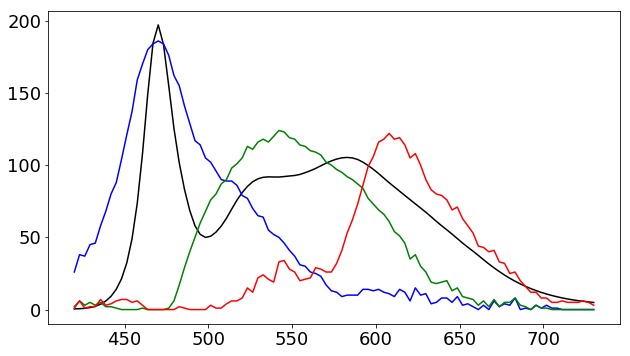

In [21]:
# RGB感度の校正をするため、LED電球を撮影した動画を読み込む
cap = cv2.VideoCapture( '/Users/jun/Downloads/spectorLED.mov' )

spectorPixelWidth = 1000; spectorPixelStart = 1430
spector = np.zeros( ( spectorPixelWidth, 3 ), np.float )

ret, frame = cap.read()
spector[ :, : ] = frame[  1032, 
    spectorPixelStart : spectorPixelStart + spectorPixelWidth,
                : ].astype( np.float )
cap.release()

refSpector = np.array([ # 専用計測器で測色した、420-730 nm のスペクトル
1.638119,2.093764,3.04195,4.833911,7.93789,12.9769,20.69887,32.15547,49.20466,74.65795,112.9945,171.2231,257.7097,378.0208,522.265,645.5838,689.8769,642.4892,542.3141,438.5102,355.7205,291.4024,240.3038,203.2124,182.0818,174.8979,177.8017,187.5845,202.2752,221.2795,243.563,265.233,283.5265,298.4554,309.789,316.9195,320.5145,321.6317,321.2917,321.1957,322.3668,323.7441,324.9761,327.5136,331.7605,336.6077,342.1205,348.5329,354.9223,360.3258,364.7598,367.7524,368.7229,367.5326,363.7716,357.3163,349.1665,339.8969,329.535,318.4432,307.5739,297.127,286.8917,276.5889,266.3273,256.1332,246.1111,235.8713,224.9984,213.8645,203.2659,193.188,182.8755,172.0058,161.2043,151.1407,141.4793,131.3061,120.7901,110.6347,101.1095,92.08778,83.65723,75.87135,68.72185,62.1938,56.24538,50.86713,46.01137,41.61138,37.66303,34.14824,31.03478,28.23358,25.71879,23.51544,21.60126,19.964,18.53519,17.19183
])
wl = np.linspace( 420, 730, 100 )

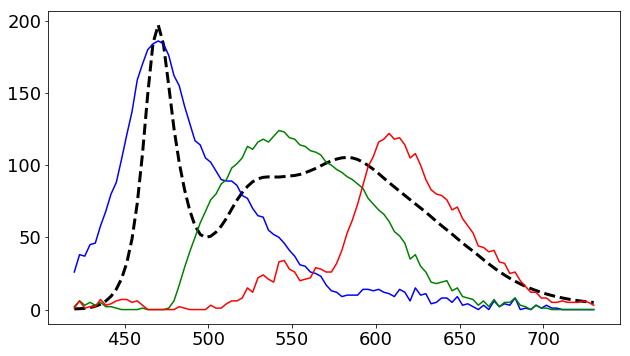

In [26]:
plt.plot( wl, refSpector/3.5, color = "k", linestyle="--", lw=3 ) 
plt.plot( wl, spector[ ::10, 0 ], color = "b" ) 
plt.plot( wl, spector[ ::10, 1 ], color = "g" ) 
plt.plot( wl, spector[ ::10, 2 ], color = "r" ) 

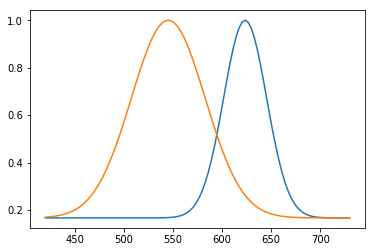

In [3]:
def normalDist(x,  mu = 0, sigma = 1):
    return np.exp( - ( x - mu )**2 / ( 2 * sigma**2 ) )

gg = np.array( [ ( 0.2 + normalDist( x, 40, 12 ) ) / 1.2 for x in np.linspace( 0, 99, 100 ) ] )
rg = np.array( [ ( 0.2 + normalDist( x, 65, 7 ) ) / 1.2 for x in np.linspace( 0, 99, 100 ) ] )

plt.plot( wl, rg )
plt.plot( wl, gg )

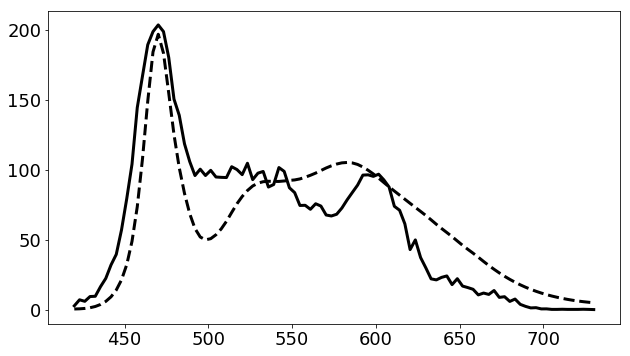

In [28]:
def slice2spec( slice ):
    b = np.array( [ x**2.2 * 255 for x in slice[ ::10, 0 ] / 255 ] )
    g = np.array( [ x**2.2 * 255 for x in slice[ ::10, 1 ] /255 ] )
    r = np.array( [ x**2.2 * 255 for x in slice[ ::10, 2 ] /255 ] ) 
    return 1.6 * b + 1.5 * g/gg + 0.7 * r/rg

powData = slice2spec( spector )  

plt.plot( wl, refSpector/3.5, color = "k", linestyle="--", lw=3 ) 
plt.plot( wl, powData, color = "k", linestyle="-", lw=3 )

In [5]:
# 太陽近傍撮影動画を開く
cap = cv2.VideoCapture( '/Users/jun/Downloads/sun.mov' )

# 動画の縦横サイズを取得
w = round( cap.get( cv2.CAP_PROP_FRAME_WIDTH ) )
h  = round( cap.get( cv2.CAP_PROP_FRAME_HEIGHT ) )
# 動画フレーム数やFPS
frame_n = round( cap.get(cv2.CAP_PROP_FRAME_COUNT) )
#fps = round( cap.get(cv2.CAP_PROP_FPS) )

spectorPixelWidth = 1000
#spectorPixelStart = 1430
spectorPixelStart = 1350

spector = np.zeros( ( spectorPixelWidth, 3 ), np.float )

ret, frame = cap.read()
spector[ :, : ] = frame[  
                1032, 
                spectorPixelStart : spectorPixelStart + spectorPixelWidth,
                : ].astype( np.float )
cap.release()

powData = slice2spec( spector )  

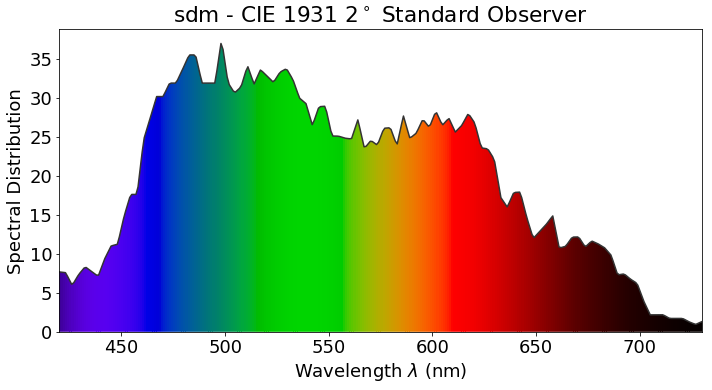

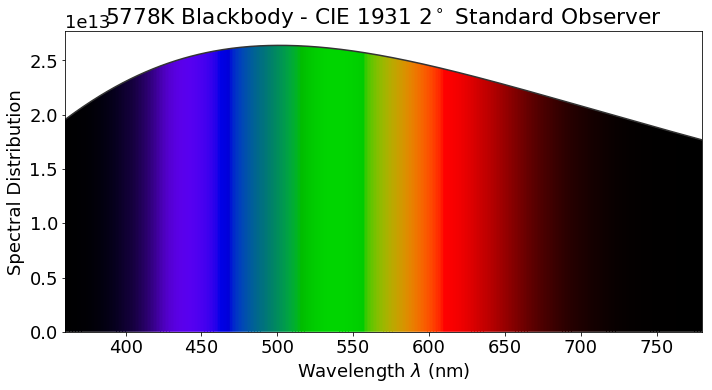

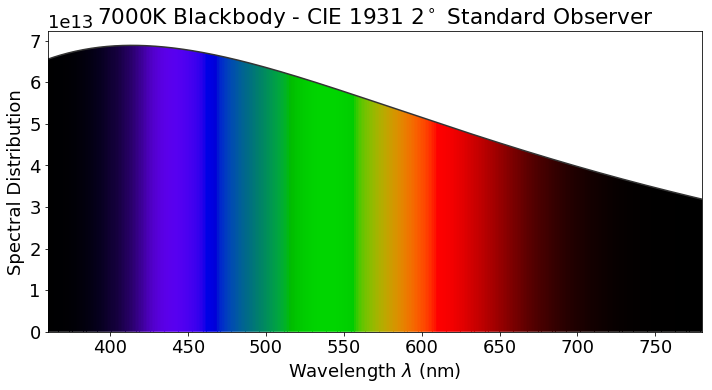

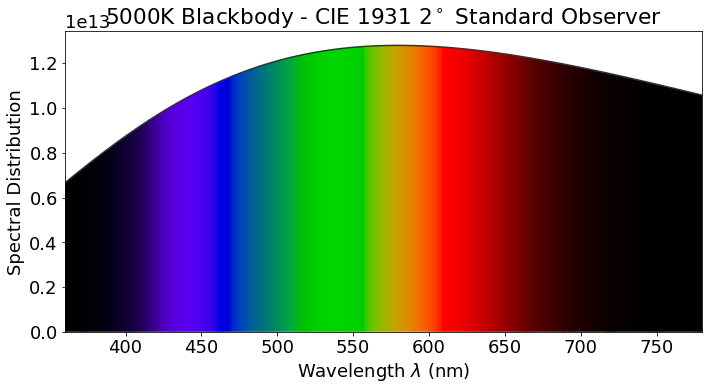

In [8]:
# c.f.
# https://github.com/colour-science/Colour/
# https://github.com/colour-science/Colour/#colour-appearance-models-colour-appearance
# https://colab.research.google.com/drive/1Im9J7or9qyClQCv5sPHmKdyiQbG4898K#offline=true&sandboxMode=true&scrollTo=z2OV86Vmmv-J

import colour
from colour.plotting import *

WLvsPow =  dict( zip ( wl, powData ) ) # 波長：強度, の辞書リスト
sdm = colour.SpectralDistribution( WLvsPow, name='sdm' )
plot_single_sd( sdm );
sd=colour.sd_blackbody( 5778 ); plot_single_sd( sd );

sd=colour.sd_blackbody( 7000 ); plot_single_sd( sd );

sd=colour.sd_blackbody( 5000 ); plot_single_sd( sd );

#plot_visible_spectrum();

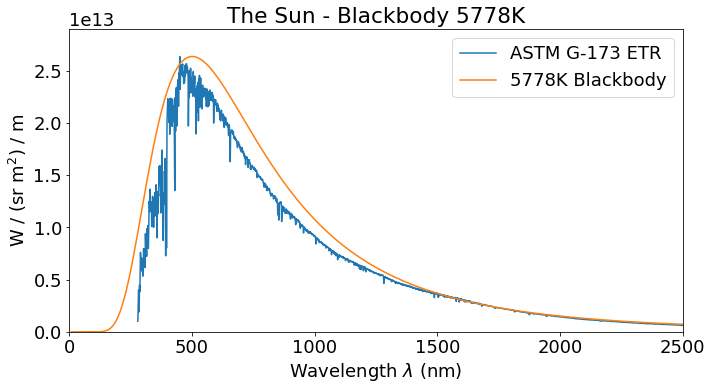

In [9]:
blackbody_sd = colour.sd_blackbody( 5778, 
                                   colour.SpectralShape(10, 10000, 10 ) )
ASTM_G_173_sd = colour.plotting.ASTM_G_173_ETR.copy()
ASTM_G_173_sd /= np.max( ASTM_G_173_sd.values )
ASTM_G_173_sd *= np.max( np.nan_to_num( blackbody_sd.values ) )

plot_multi_sds(
    [ASTM_G_173_sd, blackbody_sd], **{
        'bounding_box': [0, 2500, 0, max( ASTM_G_173_sd.values )*1.1],
        'title': 'The Sun - Blackbody 5778K',
        'y_label': 'W / (sr m$^2$) / m',
    });

In [10]:
# ここからは分光（2次元）画像生成
# このセルは不要（残しておく＝使うのは、オフセット位置を確認するため）

# ファイルからビデオを開く
cap = cv2.VideoCapture( '/Users/jun/Downloads/D17FDC63-A6EA-4A79-A883-A464DB8143AE_.mov' )

# 動画の縦横サイズを取得
w = round( cap.get( cv2.CAP_PROP_FRAME_WIDTH ) )
h  = round( cap.get( cv2.CAP_PROP_FRAME_HEIGHT ) )

spectorPixelWidth = 1000
spectorPixelStart = 1350
spector = np.zeros( ( spectorPixelWidth, 3 ), np.float )

ret, frame = cap.read()
spector[ :, : ] = frame[  
                1032, 
                spectorPixelStart : spectorPixelStart + spectorPixelWidth,
                : ].astype( np.float )
cap.release()

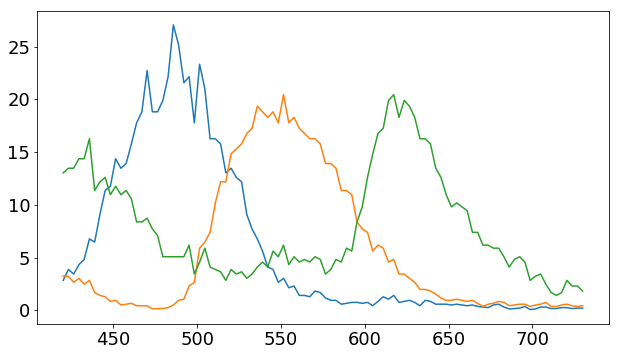

In [11]:
# このセルは不要(だが、波長分布確認用に残しておく)
b = np.array( [ x**2.2 * 255 for x in spector[ ::10, 0 ] / 255 ] )
g = np.array( [ x**2.2 * 255 for x in spector[ ::10, 1 ] /255 ] ) # 2.0
r = np.array( [ x**2.2 * 255 for x in spector[ ::10, 2 ] /255 ] ) # 1.8
plt.plot( wl, b )
plt.plot( wl, g )
plt.plot( wl, r )

#powData = slice2spec( spector )  
#plt.plot( wl, powData )

In [12]:
cap = cv2.VideoCapture( '/Users/jun/Downloads/A58687D8-63F3-44CD-933D-2C8F7016620C_.mov' )

w = round( cap.get( cv2.CAP_PROP_FRAME_WIDTH ) )
h  = round( cap.get( cv2.CAP_PROP_FRAME_HEIGHT ) )
frame_n = round( cap.get(cv2.CAP_PROP_FRAME_COUNT) )
frame_n = 384

# RGB3チャンネル画像格納用行列を作成する
spectorImg = np.zeros( ( h, frame_n, 3 ), np.float )

n = 0
while( cap.isOpened() ):
    ret, frame = cap.read()
    if ret:
        spectorImg[ :, n, 0 ] = frame[ :, spectorPixelStart+800, 2 ].astype( np.float ) # R
        spectorImg[ :, n, 1 ] = frame[ :, spectorPixelStart+400, 1 ].astype( np.float ) # G
        spectorImg[ :, n, 2 ] = frame[ :, spectorPixelStart+200, 0 ].astype( np.float ) # B

        n = n+1
    else:
        break
cap.release()

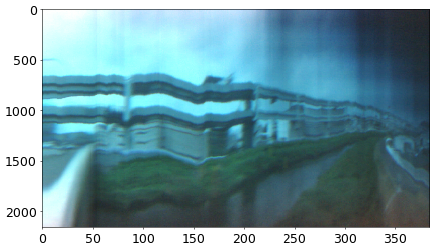

In [13]:
plt.figure( figsize=(10, 40), dpi=50 )
plt.imshow( spectorImg/255, aspect=0.1 )

In [30]:
cv2.imwrite('spectorCamera5.tiff', spectorImg )

True

In [14]:
# ここからは分光（2次元）画像生成（まずは単純にRGB画像を作ってみる）

cap = cv2.VideoCapture( '/Users/jun/Downloads/A58687D8-63F3-44CD-933D-2C8F7016620C_.mov' )

#w = round( cap.get( cv2.CAP_PROP_FRAME_WIDTH ) )
#h  = round( cap.get( cv2.CAP_PROP_FRAME_HEIGHT ) )
frame_n = round( cap.get(cv2.CAP_PROP_FRAME_COUNT) )
frame_n = 384

# 2次元分光画像
spectorImg = []

n = 0
while( cap.isOpened() ):
    ret, frame = cap.read()
    #if n > 20:
    #    break
    if ret:
        spectorSlice = []
        for y in range( 0, h, 10 ):
            spector = frame[  y,  
                spectorPixelStart : spectorPixelStart+spectorPixelWidth, 
                : ].astype( np.float )
            powData = slice2spec( spector )  
            WLvsPow =  dict( zip ( wl, powData ) ) # 波長：強度　の辞書リストを作る
            sdm = colour.SpectralDistribution(WLvsPow, name='sdm')
            spectorSlice.append( sdm )
        spectorImg.append( spectorSlice )
        n = n+1
    else:
        break
cap.release()

In [ ]:
# 記事貼り付け用

cap = cv2.VideoCapture( 'scene.mov' )
frame_n = round( cap.get(cv2.CAP_PROP_FRAME_COUNT) )
spectorImg = [] # 2次元分光画像
n = 0
while( cap.isOpened() ):
    ret, frame = cap.read()
    if ret:
        spectorSlice = []
        for y in range( 0, h, 10 ):
            spector = frame[  y,  
                spectorPixelStart : spectorPixelStart+spectorPixelWidth, 
                : ].astype( np.float )
            powData = slice2spec( spector )
            WLvsPow =  dict( zip ( wl, powData ) )
            sdm = colour.SpectralDistribution(WLvsPow, name='sdm')
            spectorSlice.append( sdm )
        spectorImg.append( spectorSlice )
        n = n+1
    else:
        break
cap.release()

In [93]:
# オブジェクトを保存しておくための関数

import pickle

pickle_dump( spectorImg, '/Users/jun/Downloads/spectorImg')

writing total_bytes=507772158...
writing bytes [0, 507772158)... done.


100


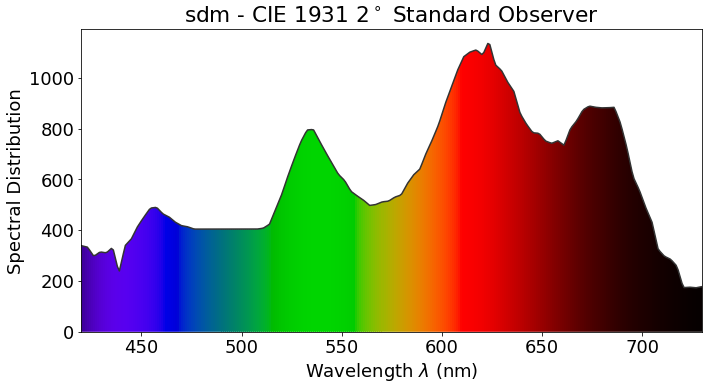

(<Figure size 737.28x414.72 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x132ed95ba8>)

In [15]:
sd_copy = spectorImg[0][0] .copy()

# Interpolating the copied sample spectral distribution.
sd_copy.interpolate( colour.SpectralShape(420, 730, 10) )
colour.XYZ_to_sRGB( colour.sd_to_XYZ( sd_copy )/100.0 )

plot_single_sd( spectorImg[0][0] )

In [16]:
sRGBImg = np.array([
   [ colour.XYZ_to_sRGB( colour.sd_to_XYZ( 
        spector.copy().interpolate(
          colour.SpectralShape( 420, 730, 10 ) 
                                                ) ) / 100.0 )
       for spector in spectorSlice
   ] for spectorSlice in spectorImg
])

In [94]:
pickle_dump( sRGBImg, '/Users/jun/Downloads/sRGBImg')

writing total_bytes=1990819...
writing bytes [0, 1990819)... done.


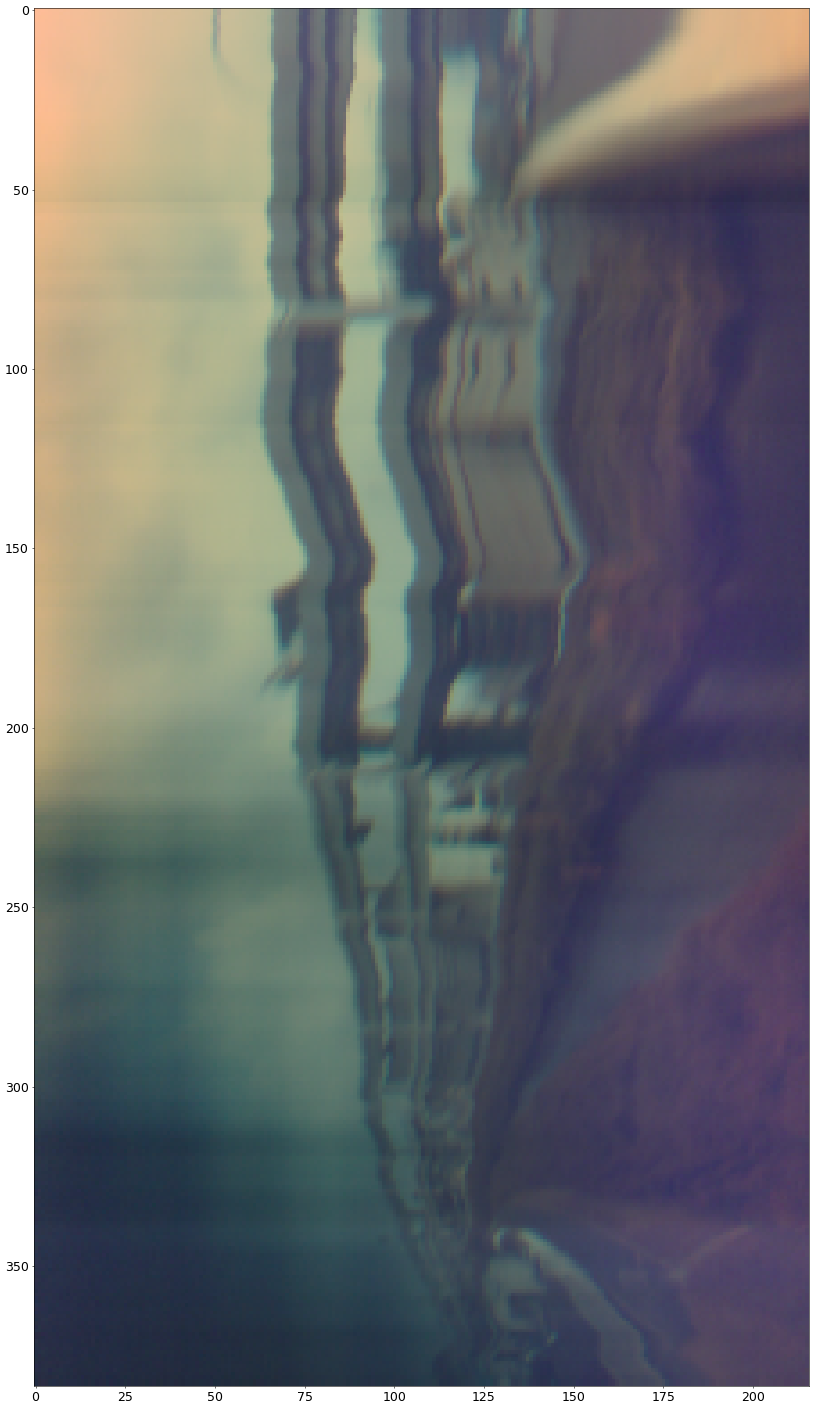

In [17]:
plt.figure( figsize=(20, 80), dpi=50 )
plt.imshow(  sRGBImg/np.max( sRGBImg), aspect=1/1 )

In [88]:
cv2.imwrite('sRGBImg.tiff', sRGBImg/np.max( sRGBImg) )

True

True

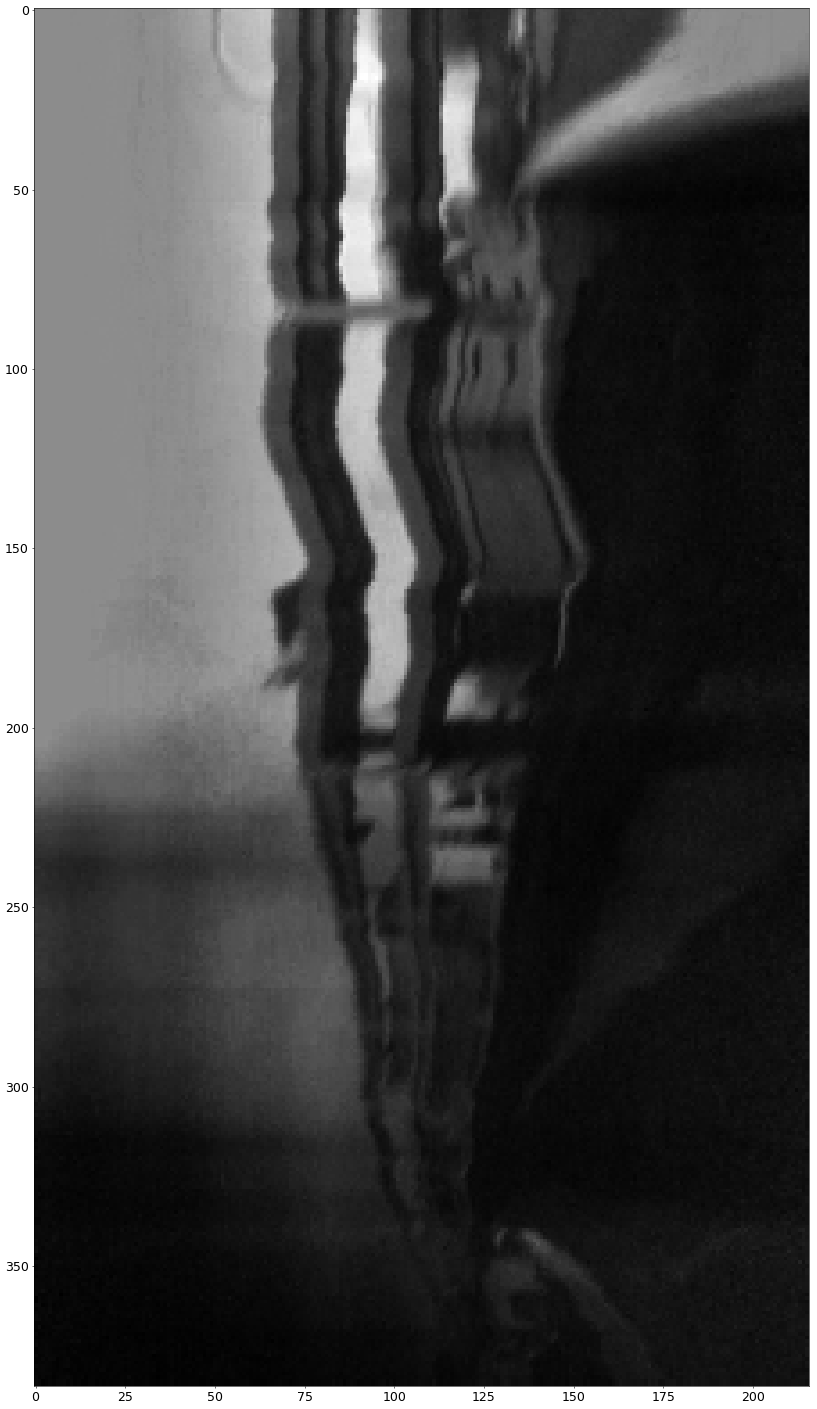

In [18]:
img500 = np.array([
   [ spector.copy().interpolate( 
    colour.SpectralShape(420, 730, 10) )[ 500 ]
       for spector in spectorSlice
   ] for spectorSlice in spectorImg
])

plt.figure( figsize=(20, 80), dpi=50 )
plt.imshow(  sRGBImg500/np.max(  img500 ), aspect=1/1,  cmap='gray')

cv2.imwrite('sRGBImg500.tiff', sRGBImg500/np.max(  img500 ) )

True

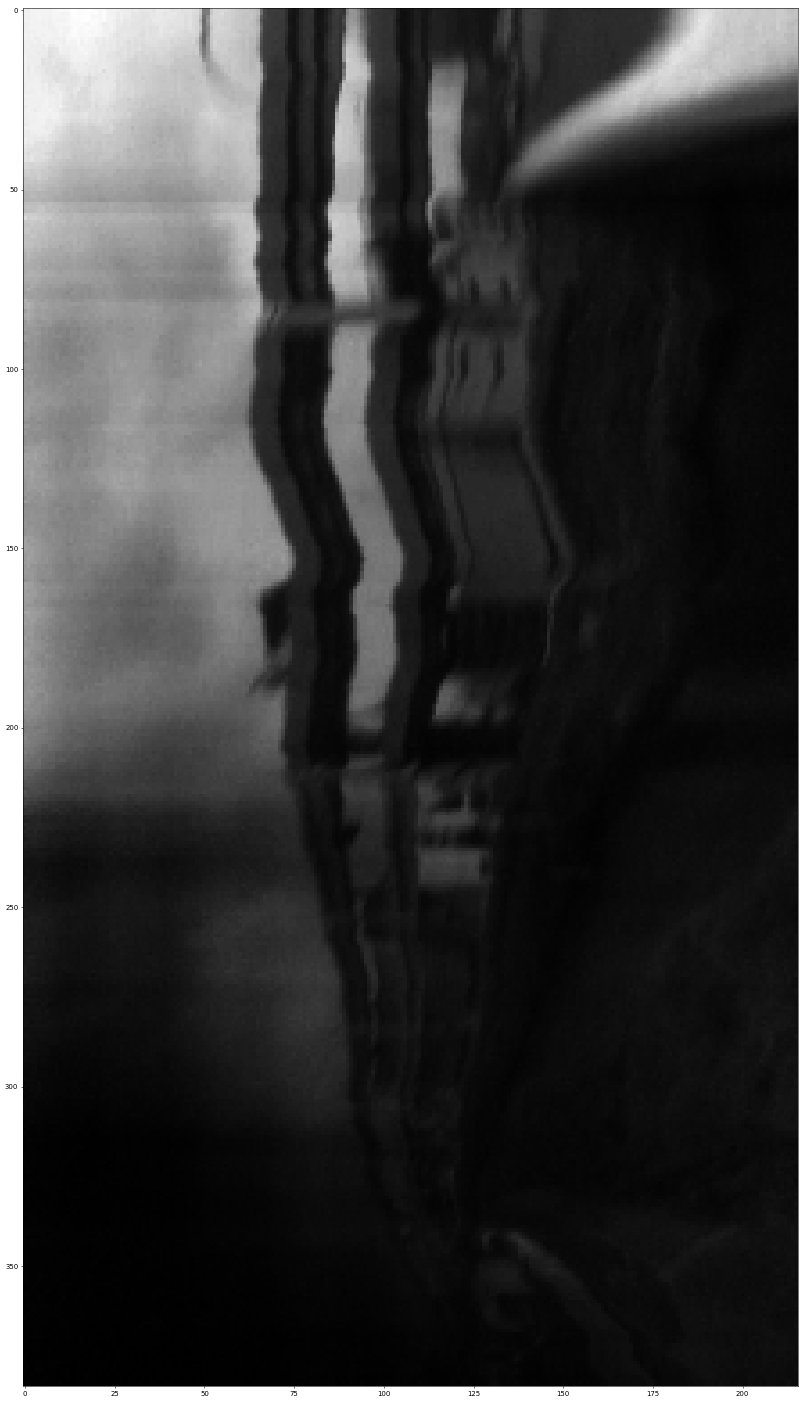

In [91]:
sRGBImg600 = np.array([
   [ 
       spector.copy().interpolate( colour.SpectralShape(420, 730, 10) )[600]
       for spector in spectorSlice
   ] for spectorSlice in spectorImg
])

plt.figure( figsize=(20, 80), dpi=50 )
plt.imshow(  sRGBImg600/np.max(  sRGBImg600 ), aspect=1/1,  cmap='gray')

cv2.imwrite('sRGBImg600.tiff', sRGBImg600/np.max(  sRGBImg600 ) )

In [ ]:
# 念のためオブジェクトを保存しておく
pickle_dump( sRGBImg, '/Users/jun/Downloads/sRGBImg')

In [ ]:
#==============ここから下はメモ==========================